    Бердникович Алеся
    БЭК 146
    4 сложная группа

# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [108]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [109]:
df= pd.read_csv("adult.data.csv",header=None, 
                names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], 
                skipinitialspace=True)

In [110]:
df[:6]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [111]:
df.shape

(32561, 15)

Посмотрим на описание признаков 

In [112]:
heads=pd.read_csv('adult_names.csv', names = ['names', 'description'], sep=':')
heads

,names,description
0,age,continuous.
1,workclass,"Private, Self-emp-not-inc, Self-emp-inc, Fede..."
2,fnlwgt,continuous.
3,education,"Bachelors, Some-college, 11th, HS-grad, Prof-..."
4,education-num,continuous.
5,marital-status,"Married-civ-spouse, Divorced, Never-married, ..."
6,occupation,"Tech-support, Craft-repair, Other-service, Sa..."
7,relationship,"Wife, Own-child, Husband, Not-in-family, Othe..."
8,race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo..."
9,sex,"Female, Male."


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [113]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [34]:
df.groupby('sex')['age'].mean()['Male']

39.433547498852683

### Вопрос 3
Какова доля граждан США?

In [87]:
df['native-country'].value_counts()['United-States']/df.shape[0]

0.89585700684868397

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

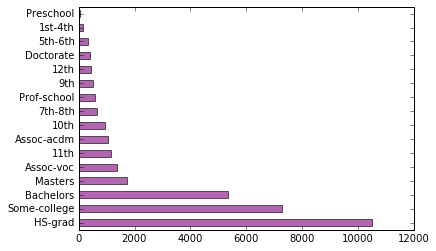

In [36]:
df['education'].value_counts().plot(kind='barh', color='purple',alpha=0.6)

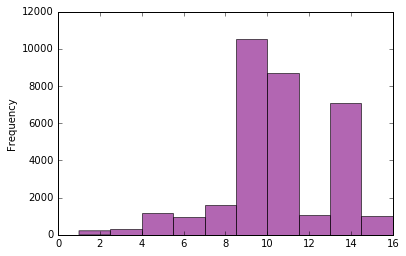

In [162]:
df['education-num'].plot(kind='hist', color='purple',alpha=0.6)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [66]:
print ('mean:',df.groupby('marital-status')['fnlwgt'].mean()['Divorced'])
print ('std:',df.groupby('marital-status')['fnlwgt'].std()['Divorced'])

mean: 185802
std: 105646.789459


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Посмотрим, какое образование в основном получили люди, зарабатывающие >50 тыс.

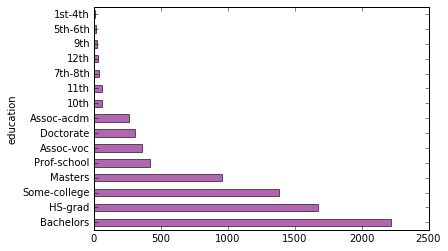

In [114]:
df.groupby('50K')['education'].value_counts()[">50K"].plot(kind='barh', color='purple',alpha=0.6)

In [115]:
df.groupby('50K')['education'].value_counts()[">50K"]

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
dtype: int64

Мы видим, что самый распространенный уровень образования среди людей зарабатывающих >50K это Бакалавр, то есть высшее образование. Теперь посмотрим какова доля каждой группы среди людей с доходом >50K

Всего людей с доходом>50K:

In [116]:
df.groupby('50K')['50K'].value_counts()[">50K"]

50K
>50K    7841
dtype: int64

In [125]:
df.groupby('50K')['education'].value_counts()[">50K"]/7841


education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
dtype: float64

Не знаю, какие группы относятся к "высшему образованию"... Пусть будут "Bachelors" "Masters" и "Doctorate". Тогда их доля: 

In [176]:
print('Доля людей с высшим образованием:',0.283255+0.122306+0.039026)

Доля людей с высшим образованием: 0.44458699999999995


Это не большинство, так что неверно. Но ответ зависит от того, какие категории считать высшим образованием.

Можем посчитать среднее количество лет обуч для каждой из групп

In [118]:
df.groupby('50K')['education-num'].mean()

50K
<=50K     9.595065
>50K     11.611657
Name: education-num, dtype: float64

В среднем, люди зарабатывающие >50K имеют образование более 11 лет,но ведь не факт, что это высшее, мб среднее специальное и тд....

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [129]:
df.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

Посмотрим в целом на распределение по профессиям:

In [135]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Для фермеров и рыбаков:

In [138]:
df.groupby('occupation')['native-country'].value_counts()['Farming-fishing']

native-country
United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Canada             2
Cuba               2
El-Salvador        2
Italy              2
Vietnam            2
Cambodia           1
England            1
France             1
Germany            1
Hong               1
Ireland            1
Japan              1
Poland             1
Portugal           1
Yugoslavia         1
dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [146]:
print('1) Для мужчин:',(df.groupby('education')['sex'].value_counts()['Bachelors']['Male'])
      /df.groupby('education')['sex'].value_counts()['Masters']['Male'])

1) Для мужчин: 3.14743049705


In [147]:
print('2) Для женщин:',(df.groupby('education')['sex'].value_counts()['Bachelors']['Female'])
      /df.groupby('education')['sex'].value_counts()['Masters']['Female'])

2) Для женщин: 3.02052238806


Отножение мужчин-бакалавров к мужчинам-магистрам больше, чем аналогиное для женщин

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [155]:
df['hours-per-week'].max()

99

Максимальное количество 99 часов в неделю

In [156]:
df['hours-per-week'].value_counts()[df['hours-per-week'].max()]

85

Столько работают 85 чел

In [159]:
df.groupby('hours-per-week')['50K'].value_counts()[99]

50K
<=50K    60
>50K     25
dtype: int64

60 человек из них зарабатывают <=50K,а 25 человек >50K